In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             precision_recall_curve, auc, PrecisionRecallDisplay)

In [2]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/project pds/Default_Fin.csv')
df


,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [3]:
# Data Preprocessing
# Drop index column as it's not a feature
df.drop('Index', axis=1, inplace=True)

In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64


In [5]:
# Visualization - Default Rates by Income Level
# Create income bins
df['Income Level'] = pd.qcut(df['Annual Salary'], q=3,
                            labels=['Low', 'Medium', 'High'])

In [6]:
# Calculate default rates
default_rates = df.groupby('Income Level')['Defaulted?'].mean().reset_index()

<ipython-input-6-400cd510eece>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby('Income Level')['Defaulted?'].mean().reset_index()


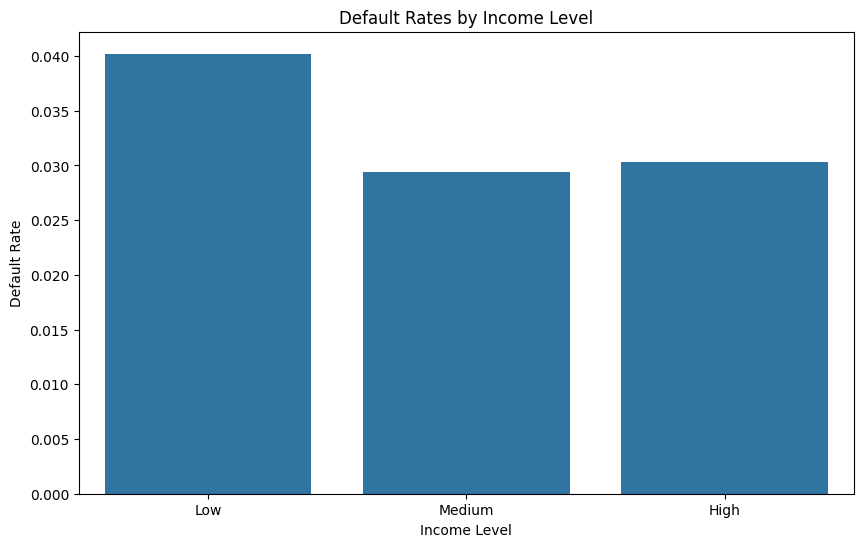

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Income Level', y='Defaulted?', data=default_rates)
plt.title('Default Rates by Income Level')
plt.ylabel('Default Rate')
plt.show()


In [8]:
#convert income level in numorical
df['Income Level'] = pd.qcut(df['Annual Salary'], q=3, labels=[0, 1, 2])
df

,Employed,Bank Balance,Annual Salary,Defaulted?,Income Level
0,1,8754.36,532339.56,0,2
1,0,9806.16,145273.56,0,0
2,1,12882.60,381205.68,0,1
3,1,6351.00,428453.88,0,1
4,1,9427.92,461562.00,0,1
...,...,...,...,...,...
9995,1,8538.72,635908.56,0,2
9996,1,9095.52,235928.64,0,0
9997,1,10144.92,703633.92,0,2
9998,1,18828.12,440029.32,0,1


In [9]:

# Prepare data for modeling
X = df[['Employed', 'Bank Balance', 'Annual Salary']]
y = df['Defaulted?']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


In [10]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:

# Train Logistic Regression model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [12]:

# Make predictions
y_pred = model.predict(X_test_scaled)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

In [13]:
# Evaluate model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 0.85
Confusion Matrix:
[[1651  282]
 [   8   59]]


In [14]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

<Figure size 1000x600 with 0 Axes>

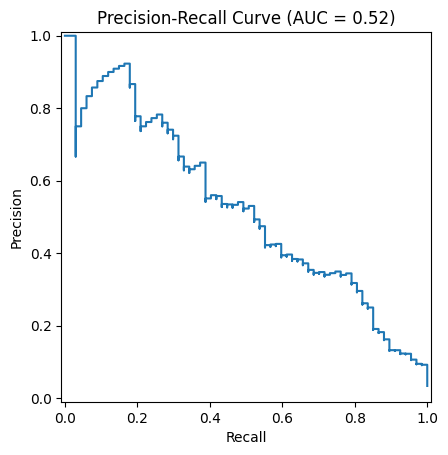

In [15]:
plt.figure(figsize=(10, 6))
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title(f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.show()

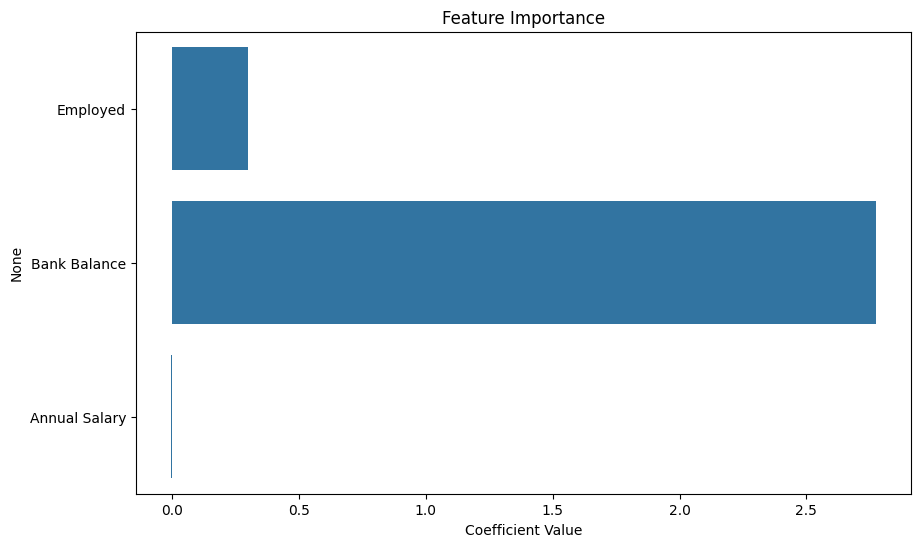

In [16]:
# Feature Importance
importance = model.coef_[0]
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.show()